In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib nbagg

In [72]:
name = ('GPrun_50iter_*prediction_UCB_default_refine.npy')
file_list = glob.glob('NionRelated/'+ name)
print(file_list)
# print(filelist)

['NionRelated/GPrun_50iter_0_prediction_UCB_default_refine.npy']


In [73]:
filename = file_list[0]
pred = np.load(filename)
abr = np.load(filename.replace('prediction','abr_coeff'))
ronch_array = np.load(filename.replace('prediction', 'ronchigram'))
best_seen = np.argmax(pred)

In [74]:
print(best_seen)
print(pred[best_seen])
print(ronch_array.shape)

16
[0.97226354]
(50, 128, 128)


<IPython.core.display.Javascript object>


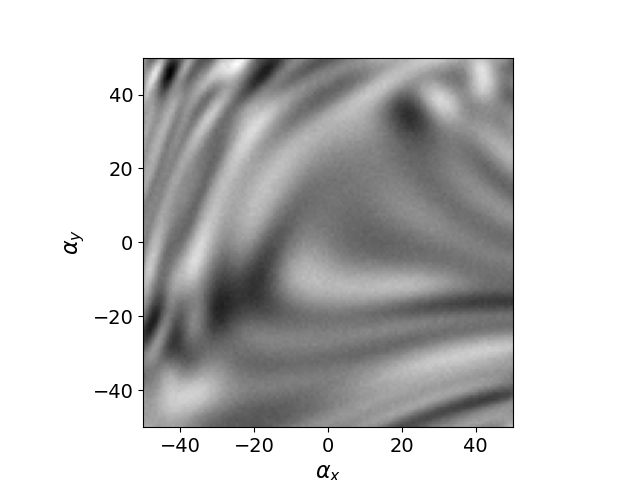

In [75]:

fig, ax = plt.subplots(1,1)
img = ax.imshow(ronch_array[best_seen+1,:,:], extent = [-50,50,-50,50], cmap = 'gray')
ax.set_xlabel(r'$\alpha_x$',fontsize = 16)
ax.set_ylabel(r'$\alpha_y$', fontsize = 16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

<IPython.core.display.Javascript object>


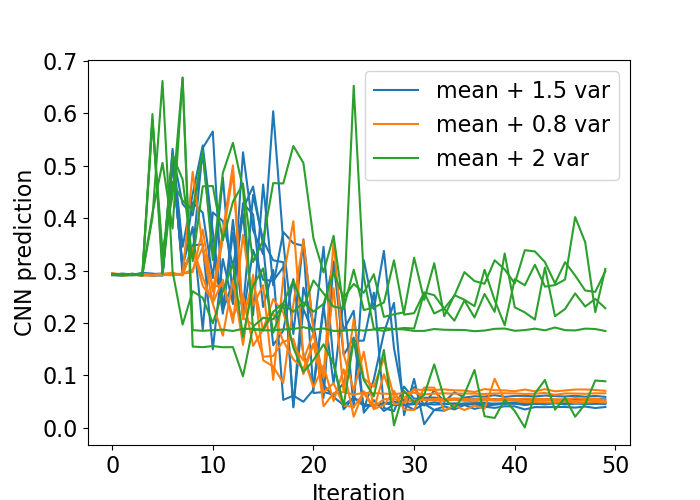

In [43]:
fig, ax = plt.subplots(1,1, figsize = [7,5])

name = ('GPrun_50iter_*prediction_UCB_default.npy')
file_list = glob.glob('NionRelated/'+ name)
for i in range(len(file_list)):
    filename = file_list[i]
    pred = np.load(filename)
    abr = np.load(filename.replace('prediction','abr_coeff'))
    if i == 0:
        p = ax.plot(1 - pred, c = 'C0', label = 'mean + 1.5 var')
    else:
        p = ax.plot(1 - pred, c = 'C0')
    
name = ('GPrun_50iter_*prediction_UCB_0.02_0.4.npy')
file_list = glob.glob('NionRelated/'+ name)
for i in range(len(file_list)):
    filename = file_list[i]
    pred = np.load(filename)
    abr = np.load(filename.replace('prediction','abr_coeff'))
    if i == 0:
        p = ax.plot(1 - pred, c = 'C1', label = 'mean + 0.8 var')
    else:
        p = ax.plot(1 - pred, c = 'C1')
        
name = ('GPrun_50iter_*prediction_UCB_2_None.npy')
file_list = glob.glob('NionRelated/'+ name)
for i in range(len(file_list)):
    filename = file_list[i]
    pred = np.load(filename)
    abr = np.load(filename.replace('prediction','abr_coeff'))
    if i == 0:
        p = ax.plot(1 - pred, c = 'C2', label = 'mean + 2 var')
    else:
        p = ax.plot(1 - pred, c = 'C2')
    
ax.set_xlabel('Iteration',fontsize = 16)
ax.set_ylabel('CNN prediction', fontsize = 16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.legend(fontsize = 16)

<IPython.core.display.Javascript object>


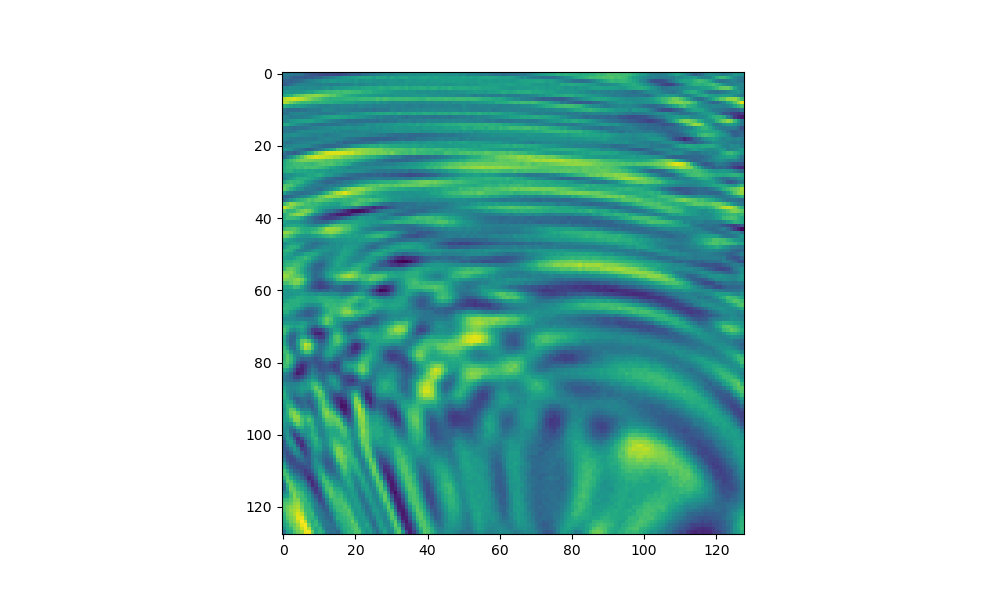

NameError: name 'abr_lim' is not defined

In [8]:
fig, ax = plt.subplots(1,1, figsize = [10,6])
idx = 0

name = ('GPrun_50iter_*prediction_UCB_default.npy')
file_list = glob.glob('NionRelated/'+ name)
for i in range(len(file_list)):
    filename = file_list[i]
    pred = np.load(filename)
    abr = np.load(filename.replace('prediction','abr_coeff'))
    if i == 0:
        p = ax.plot(np.abs(abr[:,1] * abr_lim[1] - abr_lim[1] / 2) * 1e9, c = 'C0' , label = 'default')
    else:
        p = ax.plot(np.abs(abr[:,1] * abr_lim[1] - abr_lim[1] / 2) * 1e9, c = 'C0' )
    
name = ('GPrun_50iter_*prediction_UCB_0.02_0.4.npy')
file_list = glob.glob('NionRelated/'+ name)
for i in range(len(file_list)):
    filename = file_list[i]
    pred = np.load(filename)
    abr = np.load(filename.replace('prediction','abr_coeff'))
    if i == 0:
        p = ax.plot(np.abs(abr[:,1] * abr_lim[1] - abr_lim[1] / 2) * 1e9, c = 'C1' , label = 'modified')
    else:
        p = ax.plot(np.abs(abr[:,1] * abr_lim[1] - abr_lim[1] / 2) * 1e9, c = 'C1' )

        
ax.set_xlabel('Iteration',fontsize = 16)
ax.set_ylabel(abr_list[idx] + ' (nm)', fontsize = 16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.legend(fontsize=16)
# ax.axhline(y=0.5, c='r')

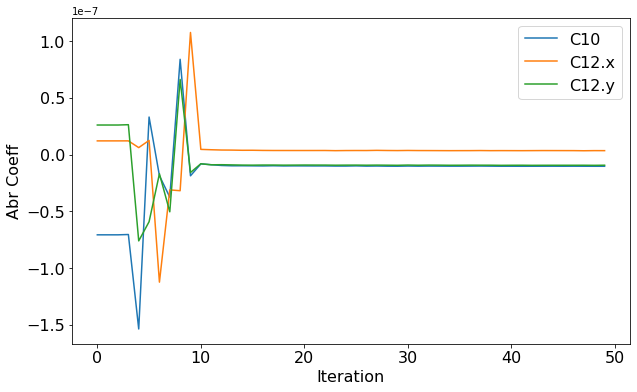

In [35]:
fig, ax = plt.subplots(1,1, figsize = [10,6])

for i in range(abr.shape[1]):
    p = ax.plot(abr[:,i] * abr_lim[i] - abr_lim[i] / 2, label = abr_list[i])
plt.legend(fontsize = 16)
ax.set_xlabel('Iteration',fontsize = 16)
ax.set_ylabel('Abr Coeff', fontsize = 16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

In [21]:
abr_list = ["C10", "C12.x", "C12.y", "C21.x", "C21.y", "C23.x", "C23.y", "C30", 
"C32.x", "C32.y", "C34.x", "C34.y"]

abr_lim = [2e-6, 2e-6, 2e-6, 3e-5, 3e-5, 3e-5, 3e-5, 4e-4, 3e-4, 3e-4, 3e-4, 3e-4]

In [102]:
name = ('GPrun_50iter_6_prediction_UCB_2_0.npy')
abr_activate = [True, True, True, False, False, False, False, False, False, False, False, False]
abr_list_active = [abr_list[i] for i in np.arange(len(abr_list)) if abr_activate[i]]
print(abr_list_active)
file_list = glob.glob('NionRelated/'+ name)
print(file_list)
filename = file_list[0]
pred = np.load(filename)
abr = np.load(filename.replace('prediction','abr_coeff'))
ronchigram = np.load(filename.replace('prediction', 'ronchigram'))
best_seen = np.argmax(pred)

['C10', 'C12.x', 'C12.y']
['NionRelated/GPrun_50iter_6_prediction_UCB_2_0.npy']


<IPython.core.display.Javascript object>


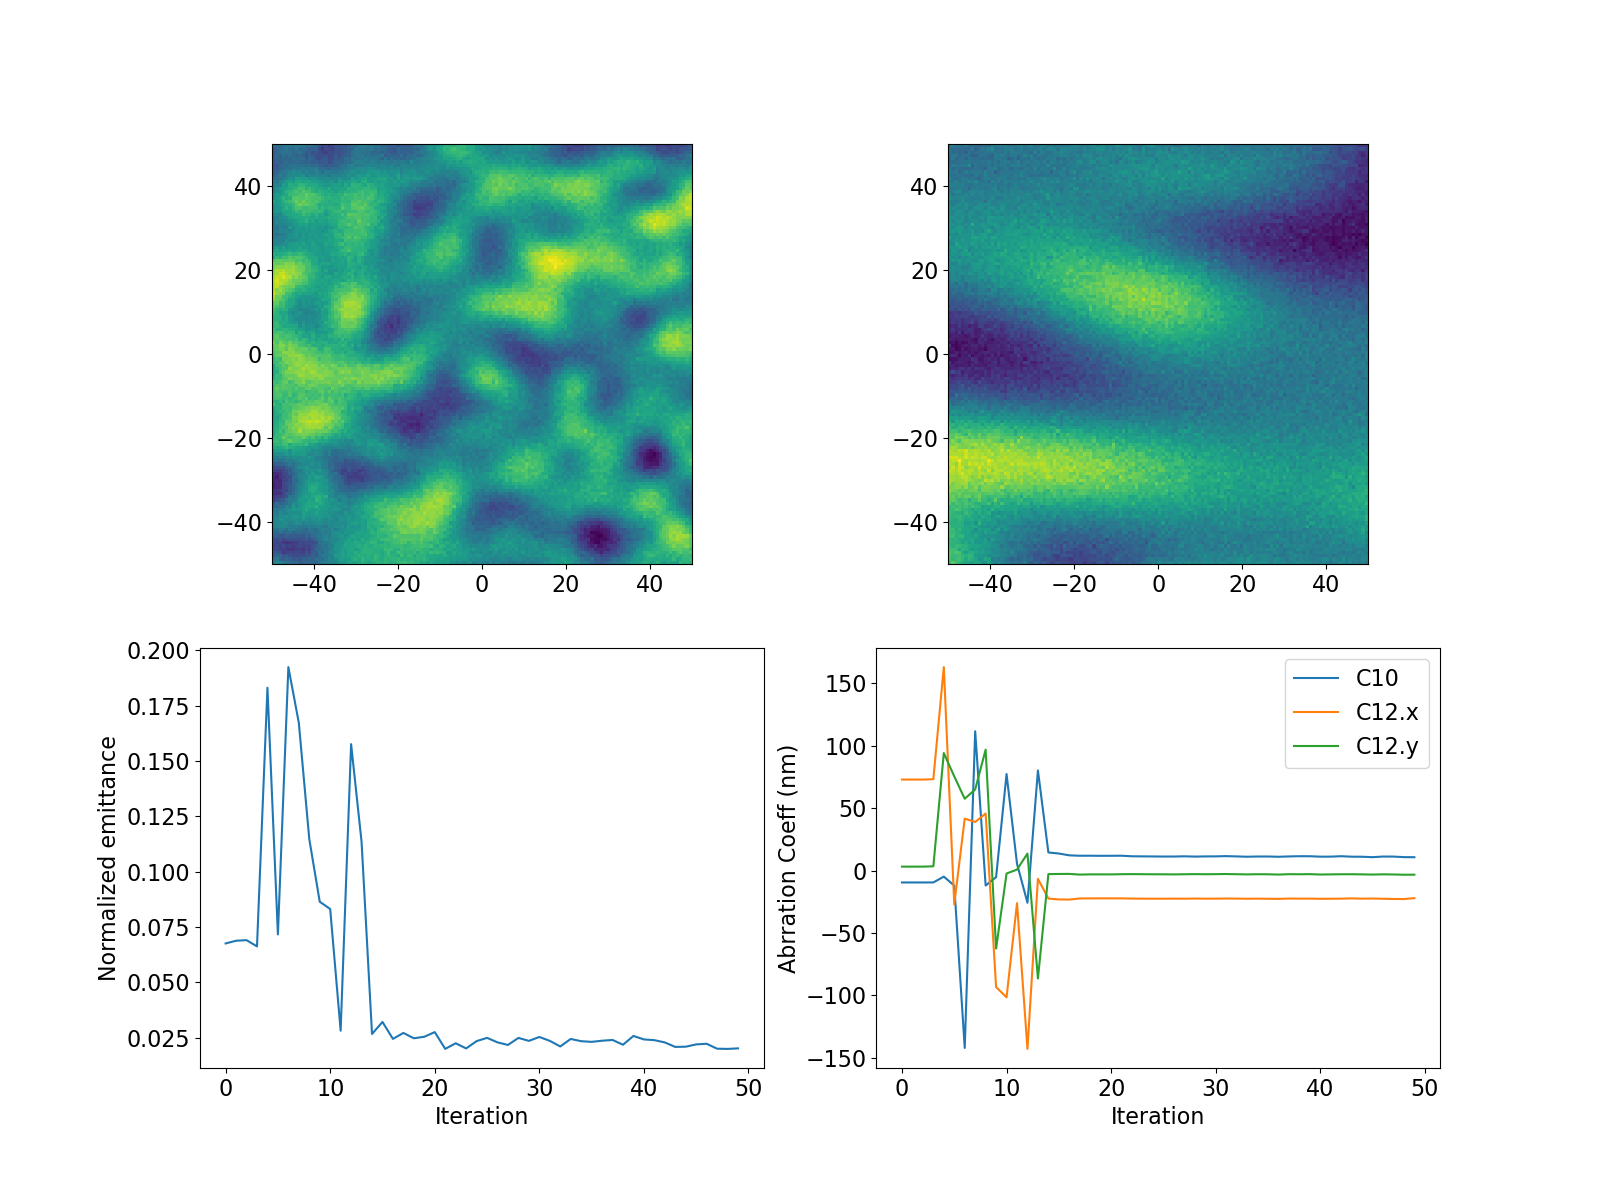

In [103]:
fig, ax = plt.subplots(2,2, figsize = [16,12])
# show initial and best Ronchigram
ax[0,0].imshow(ronchigram[0], extent = [-50,50,-50,50])
ax[0,1].imshow(ronchigram[-1], extent = [-50,50,-50,50])
ax[0,0].tick_params(axis='x', labelsize=16)
ax[0,0].tick_params(axis='y', labelsize=16)
ax[0,1].tick_params(axis='x', labelsize=16)
ax[0,1].tick_params(axis='y', labelsize=16)

# plot for normalized emittance
ax[1,0].plot(1-pred)
ax[1,0].set_xlabel('Iteration',fontsize = 16)
ax[1,0].set_ylabel('Normalized emittance', fontsize = 16)
ax[1,0].tick_params(axis='x', labelsize=16)
ax[1,0].tick_params(axis='y', labelsize=16)

# aberration coefficients:
for i in range(abr.shape[1]):
    p = ax[1,1].plot((abr[:,i] * abr_lim[i] - abr_lim[i] / 2) * 1e9, label = abr_list_active[i])
plt.legend(fontsize = 16)
ax[1,1].set_xlabel('Iteration',fontsize = 16)
ax[1,1].set_ylabel('Abrration Coeff (nm)', fontsize = 16)
ax[1,1].tick_params(axis='x', labelsize=16)
ax[1,1].tick_params(axis='y', labelsize=16)

In [109]:
name = ('GPrun_100iter_4_prediction_UCB_2_0.npy')
file_list = glob.glob('NionRelated/'+ name)
abr_activate = [True, True, True, True, True, False, False, False, False, False, False, False]
abr_list_active = [abr_list[i] for i in np.arange(len(abr_list)) if abr_activate[i]]
print(abr_list_active)
print(file_list)
filename = file_list[0]
pred = np.load(filename)
abr = np.load(filename.replace('prediction','abr_coeff'))
ronchigram = np.load(filename.replace('prediction', 'ronchigram'))
best_seen = np.argmax(pred)

['C10', 'C12.x', 'C12.y', 'C21.x', 'C21.y']
['NionRelated/GPrun_100iter_4_prediction_UCB_2_0.npy']


<IPython.core.display.Javascript object>


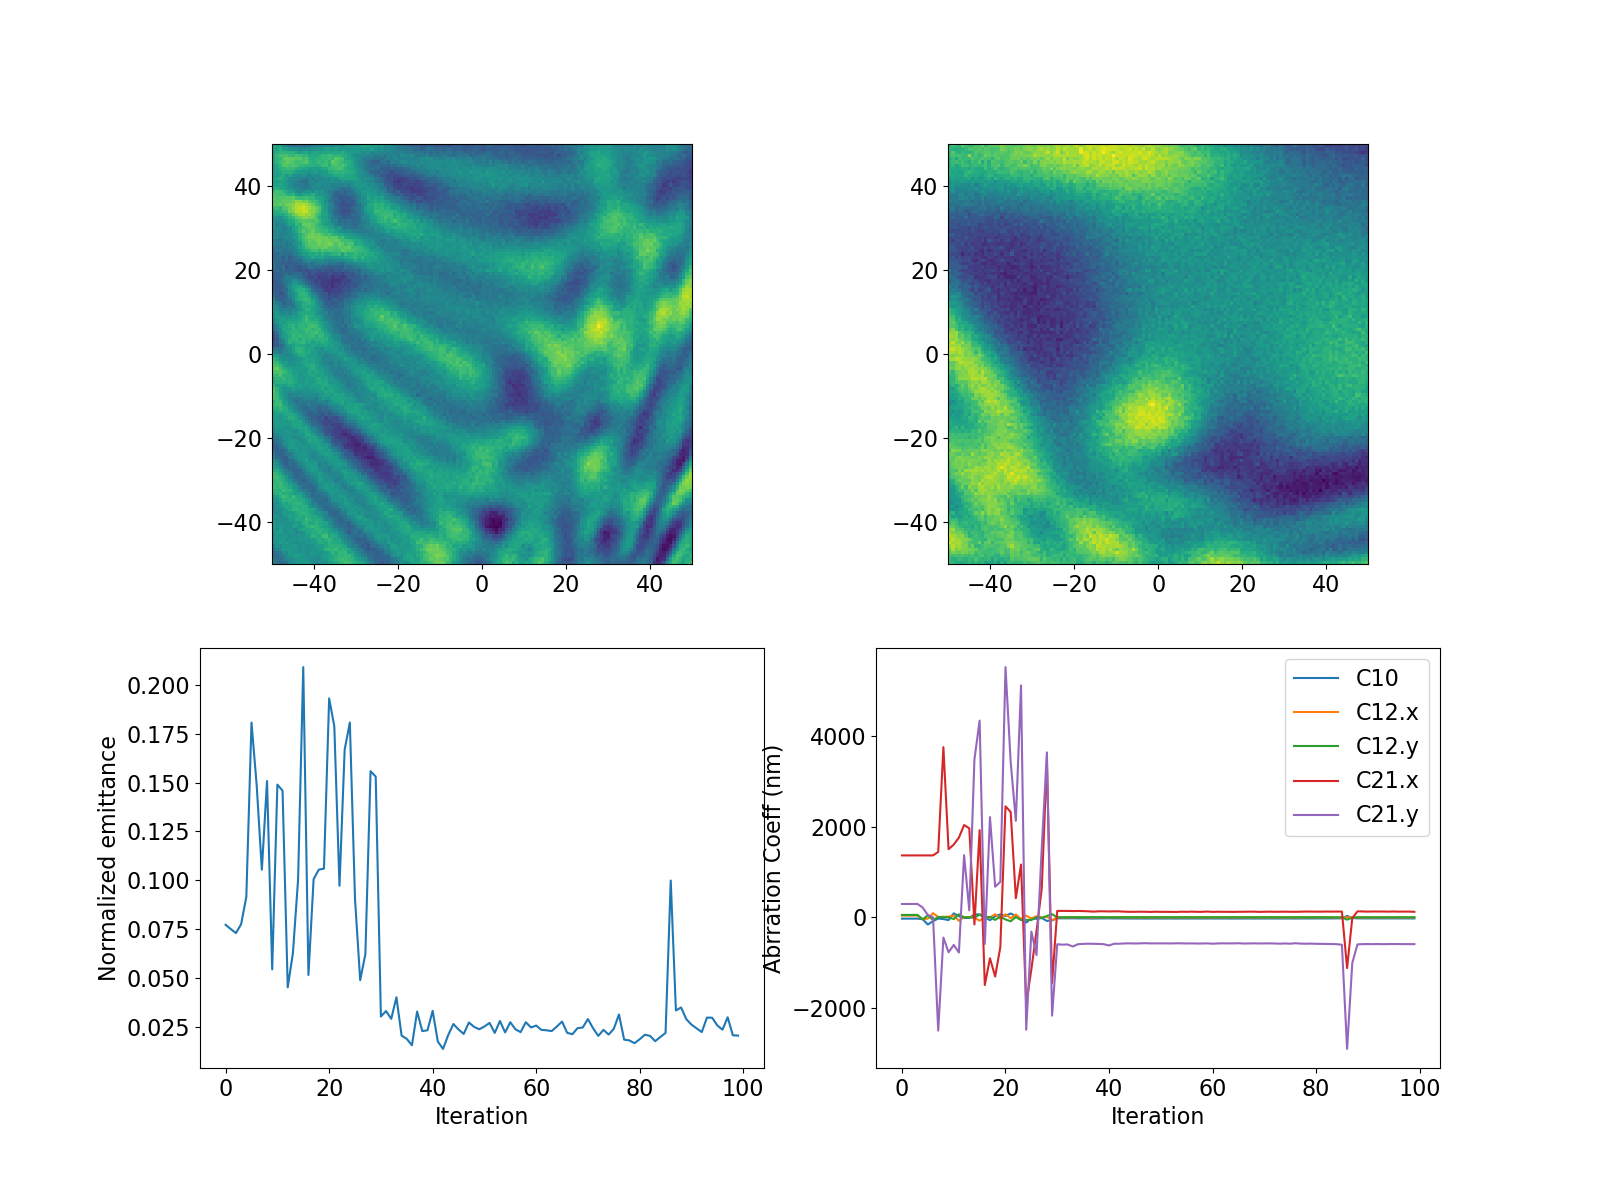

In [110]:
fig, ax = plt.subplots(2,2, figsize = [16,12])
# show initial and best Ronchigram
ax[0,0].imshow(ronchigram[0], extent = [-50,50,-50,50])
ax[0,1].imshow(ronchigram[-1], extent = [-50,50,-50,50])
ax[0,0].tick_params(axis='x', labelsize=16)
ax[0,0].tick_params(axis='y', labelsize=16)
ax[0,1].tick_params(axis='x', labelsize=16)
ax[0,1].tick_params(axis='y', labelsize=16)

# plot for normalized emittance
ax[1,0].plot(1-pred)
ax[1,0].set_xlabel('Iteration',fontsize = 16)
ax[1,0].set_ylabel('Normalized emittance', fontsize = 16)
ax[1,0].tick_params(axis='x', labelsize=16)
ax[1,0].tick_params(axis='y', labelsize=16)

# aberration coefficients:
for i in range(abr.shape[1]):
    p = ax[1,1].plot((abr[:,i] * abr_lim[i] - abr_lim[i] / 2) * 1e9, label = abr_list_active[i])
plt.legend(fontsize = 16)
ax[1,1].set_xlabel('Iteration',fontsize = 16)
ax[1,1].set_ylabel('Abrration Coeff (nm)', fontsize = 16)
ax[1,1].tick_params(axis='x', labelsize=16)
ax[1,1].tick_params(axis='y', labelsize=16)

In [107]:
name = ('GPrun_100iter_3_prediction_UCB_2_0.npy')
file_list = glob.glob('NionRelated/'+ name)
abr_activate = [True, True, True, True, True, True, True, False, False, False, False, False]
abr_list_active = [abr_list[i] for i in np.arange(len(abr_list)) if abr_activate[i]]
print(abr_list_active)
print(file_list)
filename = file_list[0]
pred = np.load(filename)
abr = np.load(filename.replace('prediction','abr_coeff'))
ronchigram = np.load(filename.replace('prediction', 'ronchigram'))
best_seen = np.argmax(pred)

['C10', 'C12.x', 'C12.y', 'C21.x', 'C21.y', 'C23.x', 'C23.y']
['NionRelated/GPrun_100iter_3_prediction_UCB_2_0.npy']


<IPython.core.display.Javascript object>


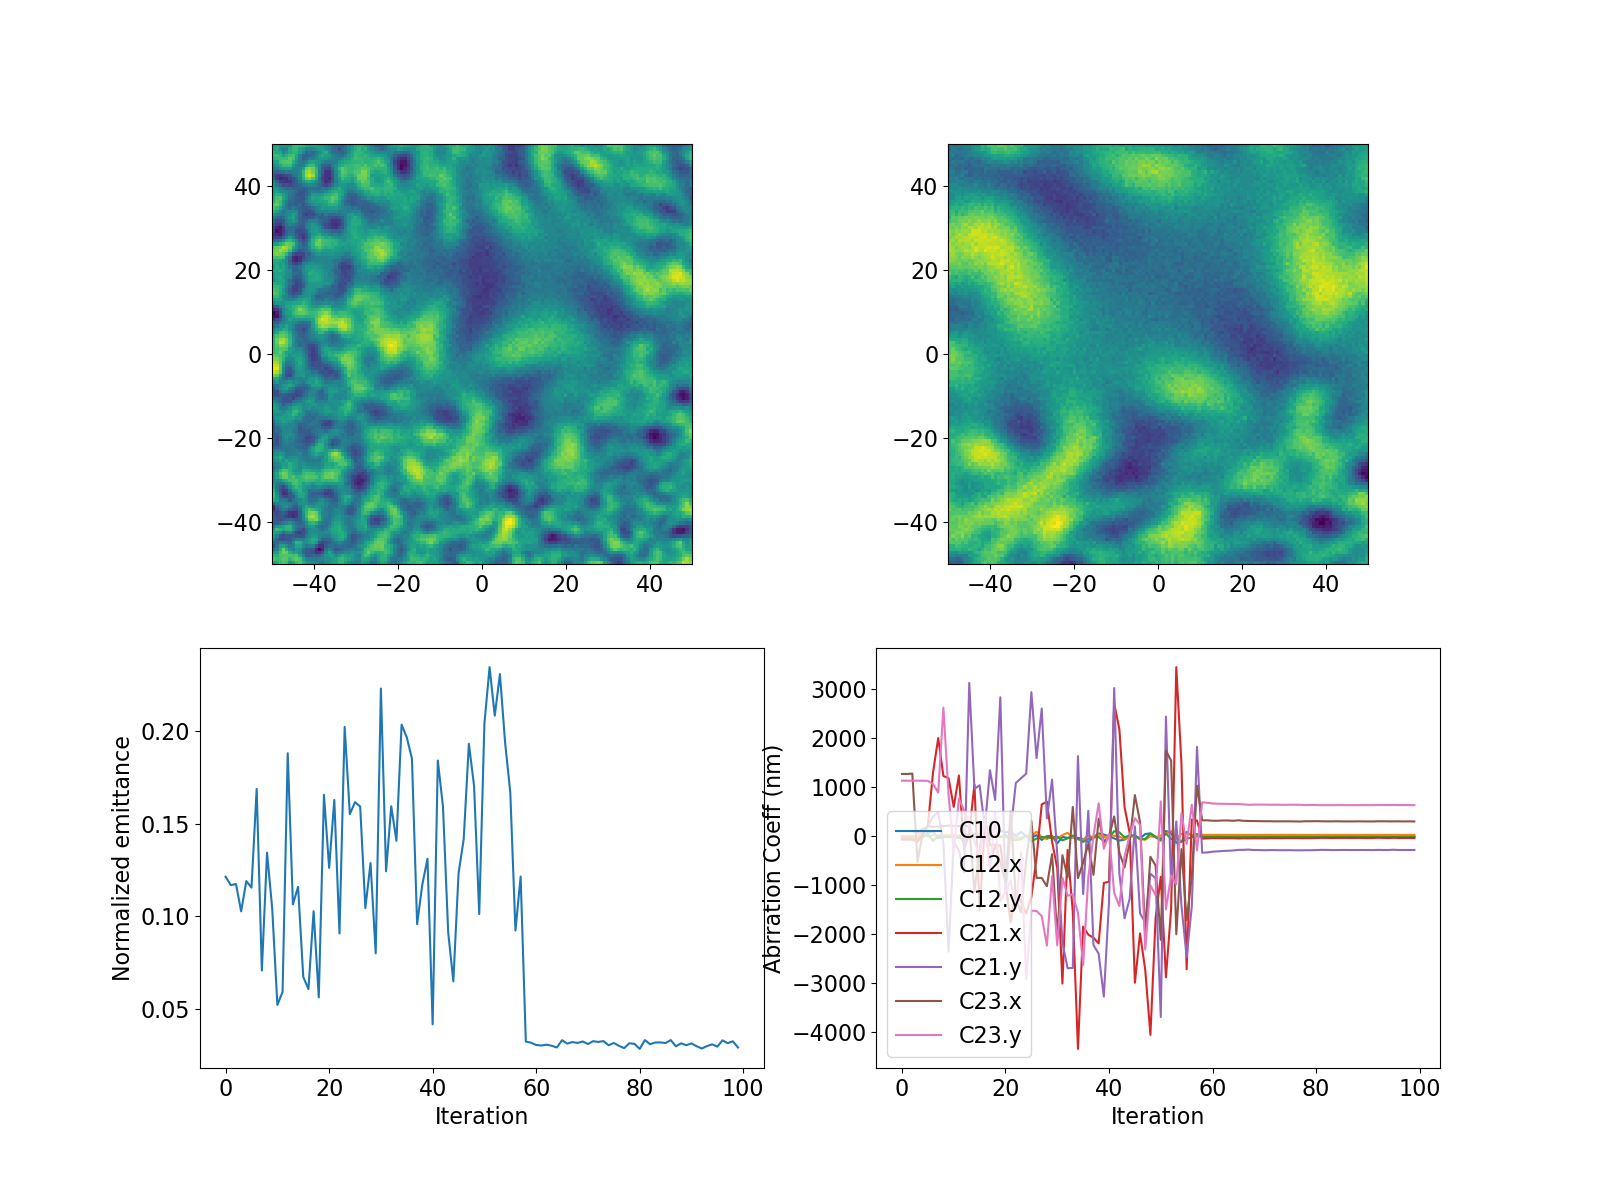

In [108]:
fig, ax = plt.subplots(2,2, figsize = [16,12])
# show initial and best Ronchigram
ax[0,0].imshow(ronchigram[0], extent = [-50,50,-50,50])
ax[0,1].imshow(ronchigram[-1], extent = [-50,50,-50,50])
ax[0,0].tick_params(axis='x', labelsize=16)
ax[0,0].tick_params(axis='y', labelsize=16)
ax[0,1].tick_params(axis='x', labelsize=16)
ax[0,1].tick_params(axis='y', labelsize=16)

# plot for normalized emittance
ax[1,0].plot(1-pred)
ax[1,0].set_xlabel('Iteration',fontsize = 16)
ax[1,0].set_ylabel('Normalized emittance', fontsize = 16)
ax[1,0].tick_params(axis='x', labelsize=16)
ax[1,0].tick_params(axis='y', labelsize=16)

# aberration coefficients:
for i in range(abr.shape[1]):
    p = ax[1,1].plot((abr[:,i] * abr_lim[i] - abr_lim[i] / 2) * 1e9, label = abr_list_active[i])
plt.legend(fontsize = 16)
ax[1,1].set_xlabel('Iteration',fontsize = 16)
ax[1,1].set_ylabel('Abrration Coeff (nm)', fontsize = 16)
ax[1,1].tick_params(axis='x', labelsize=16)
ax[1,1].tick_params(axis='y', labelsize=16)

In [113]:
name = ('GPrun_100iter_6_prediction_UCB_2_0.npy')
file_list = glob.glob('NionRelated/'+ name)
abr_activate = [True, True, True, True, True, True, True, True, False, False, False, False]
abr_list_active = [abr_list[i] for i in np.arange(len(abr_list)) if abr_activate[i]]
print(abr_list_active)
print(file_list)
filename = file_list[0]
pred = np.load(filename)
abr = np.load(filename.replace('prediction','abr_coeff'))
ronchigram = np.load(filename.replace('prediction', 'ronchigram'))
best_seen = np.argmax(pred)

['C10', 'C12.x', 'C12.y', 'C21.x', 'C21.y', 'C23.x', 'C23.y', 'C30']
['NionRelated/GPrun_100iter_6_prediction_UCB_2_0.npy']


<IPython.core.display.Javascript object>


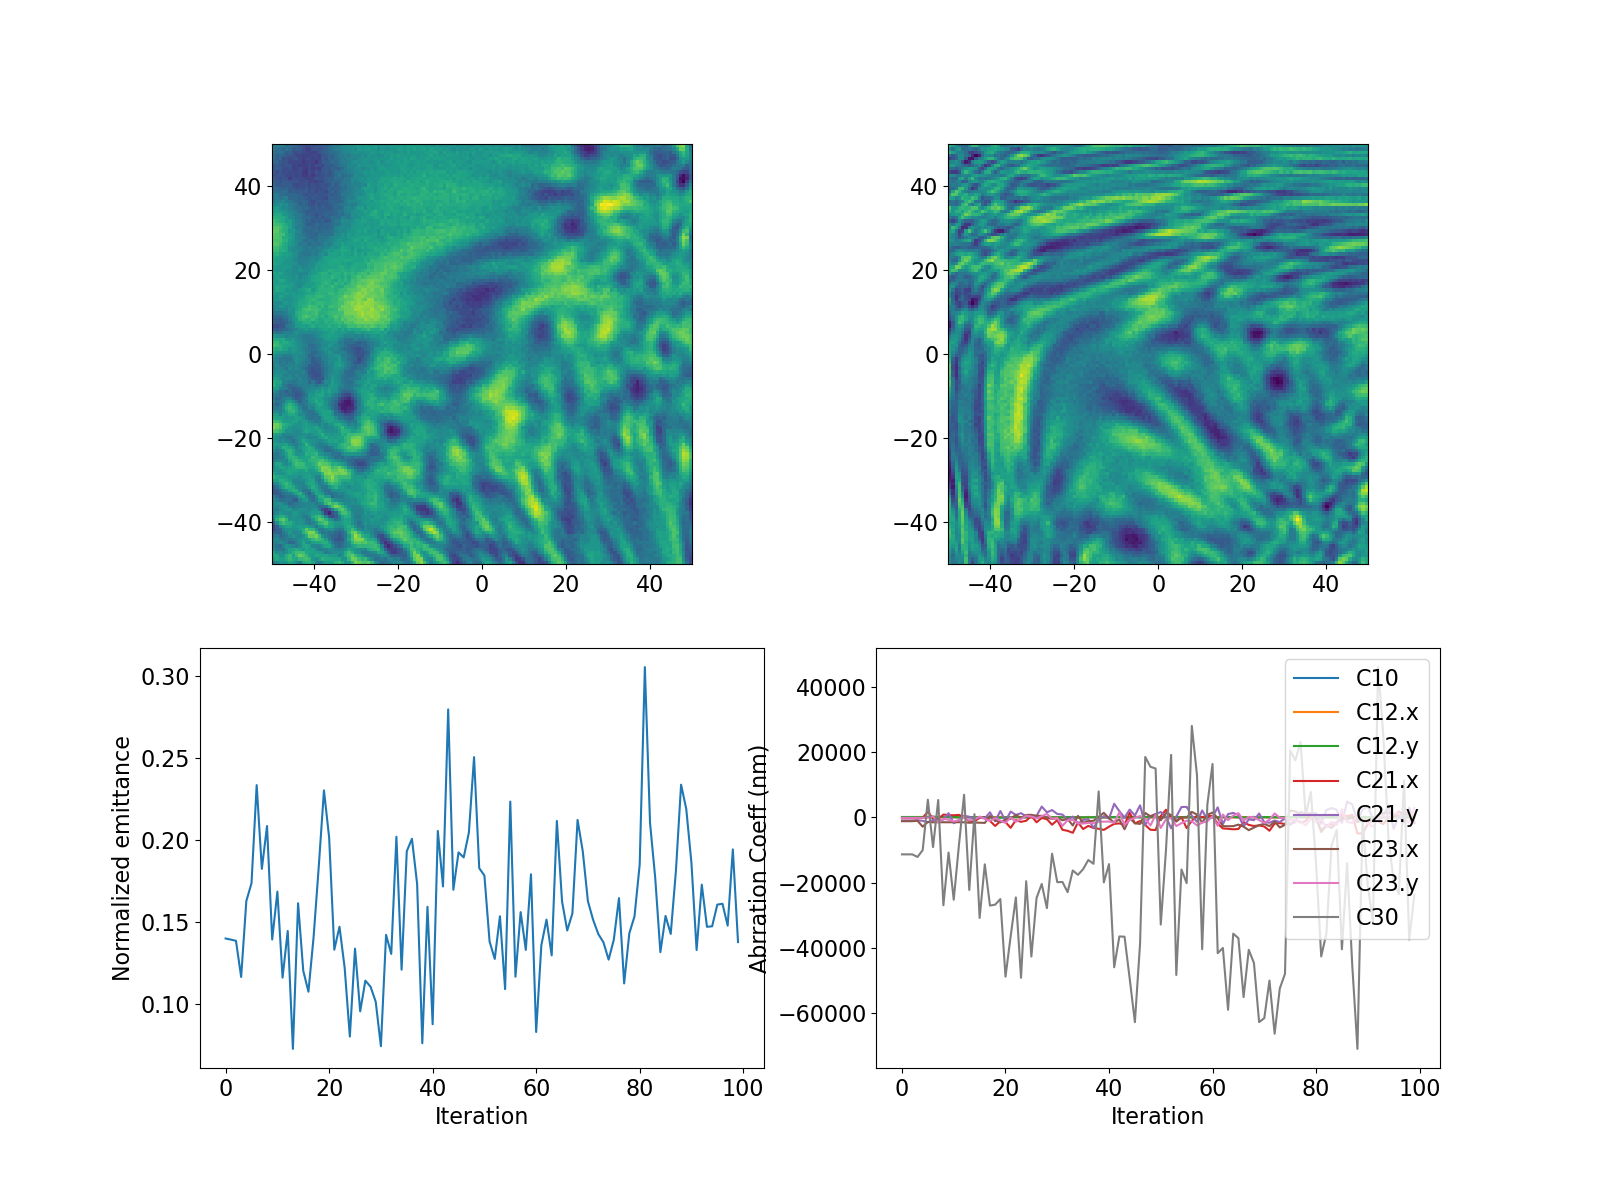

In [114]:
fig, ax = plt.subplots(2,2, figsize = [16,12])
# show initial and best Ronchigram
ax[0,0].imshow(ronchigram[0], extent = [-50,50,-50,50])
ax[0,1].imshow(ronchigram[-1], extent = [-50,50,-50,50])
ax[0,0].tick_params(axis='x', labelsize=16)
ax[0,0].tick_params(axis='y', labelsize=16)
ax[0,1].tick_params(axis='x', labelsize=16)
ax[0,1].tick_params(axis='y', labelsize=16)

# plot for normalized emittance
ax[1,0].plot(1-pred)
ax[1,0].set_xlabel('Iteration',fontsize = 16)
ax[1,0].set_ylabel('Normalized emittance', fontsize = 16)
ax[1,0].tick_params(axis='x', labelsize=16)
ax[1,0].tick_params(axis='y', labelsize=16)

# aberration coefficients:
for i in range(abr.shape[1]):
    p = ax[1,1].plot((abr[:,i] * abr_lim[i] - abr_lim[i] / 2) * 1e9, label = abr_list_active[i])
plt.legend(fontsize = 16)
ax[1,1].set_xlabel('Iteration',fontsize = 16)
ax[1,1].set_ylabel('Abrration Coeff (nm)', fontsize = 16)
ax[1,1].tick_params(axis='x', labelsize=16)
ax[1,1].tick_params(axis='y', labelsize=16)